### K Nearest Neighbor Algorithm classifiction for Glass dataset

#### 1.Load libraries/ data

In [1]:
#Loading required libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# import the required packages 
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore")

C:\Users\Sija\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
names = ['Id', 'RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'class']

glass_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", names = names)
glass_df.head()

,Id,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### 2.Summarize Data

In [3]:
glass_df.dtypes

Id             int64
RI           float64
Sodium       float64
Magnesium    float64
Aluminum     float64
Silicon      float64
Potassium    float64
Calcium      float64
Barium       float64
Iron         float64
class          int64
dtype: object

In [5]:
glass_df.describe()

,Id,RI,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The dataset has six classes of glass along with their refractive indices and components, all of which are in float64 format
There are no NA values and the components are not on the same scale

In [7]:
features = glass_df.columns[1:-1].tolist()
features

['RI',
 'Sodium',
 'Magnesium',
 'Aluminum',
 'Silicon',
 'Potassium',
 'Calcium',
 'Barium',
 'Iron']

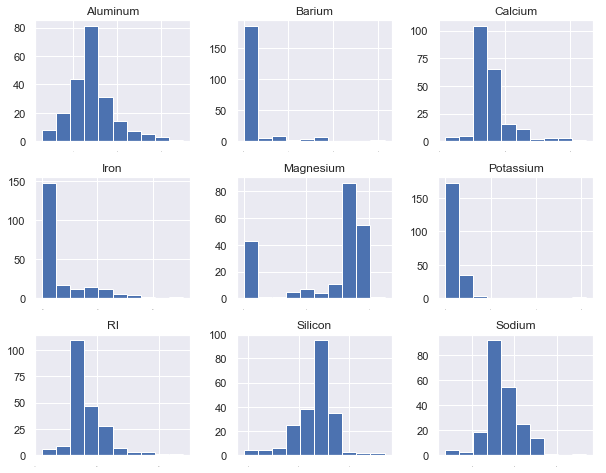

In [8]:
#Univariate analysis and visualizations
glass_df[features].hist(xlabelsize=1, figsize= (10,8))
plt.show()

The distribution of the features vary, a few are normally distributed while a few others exponentially.

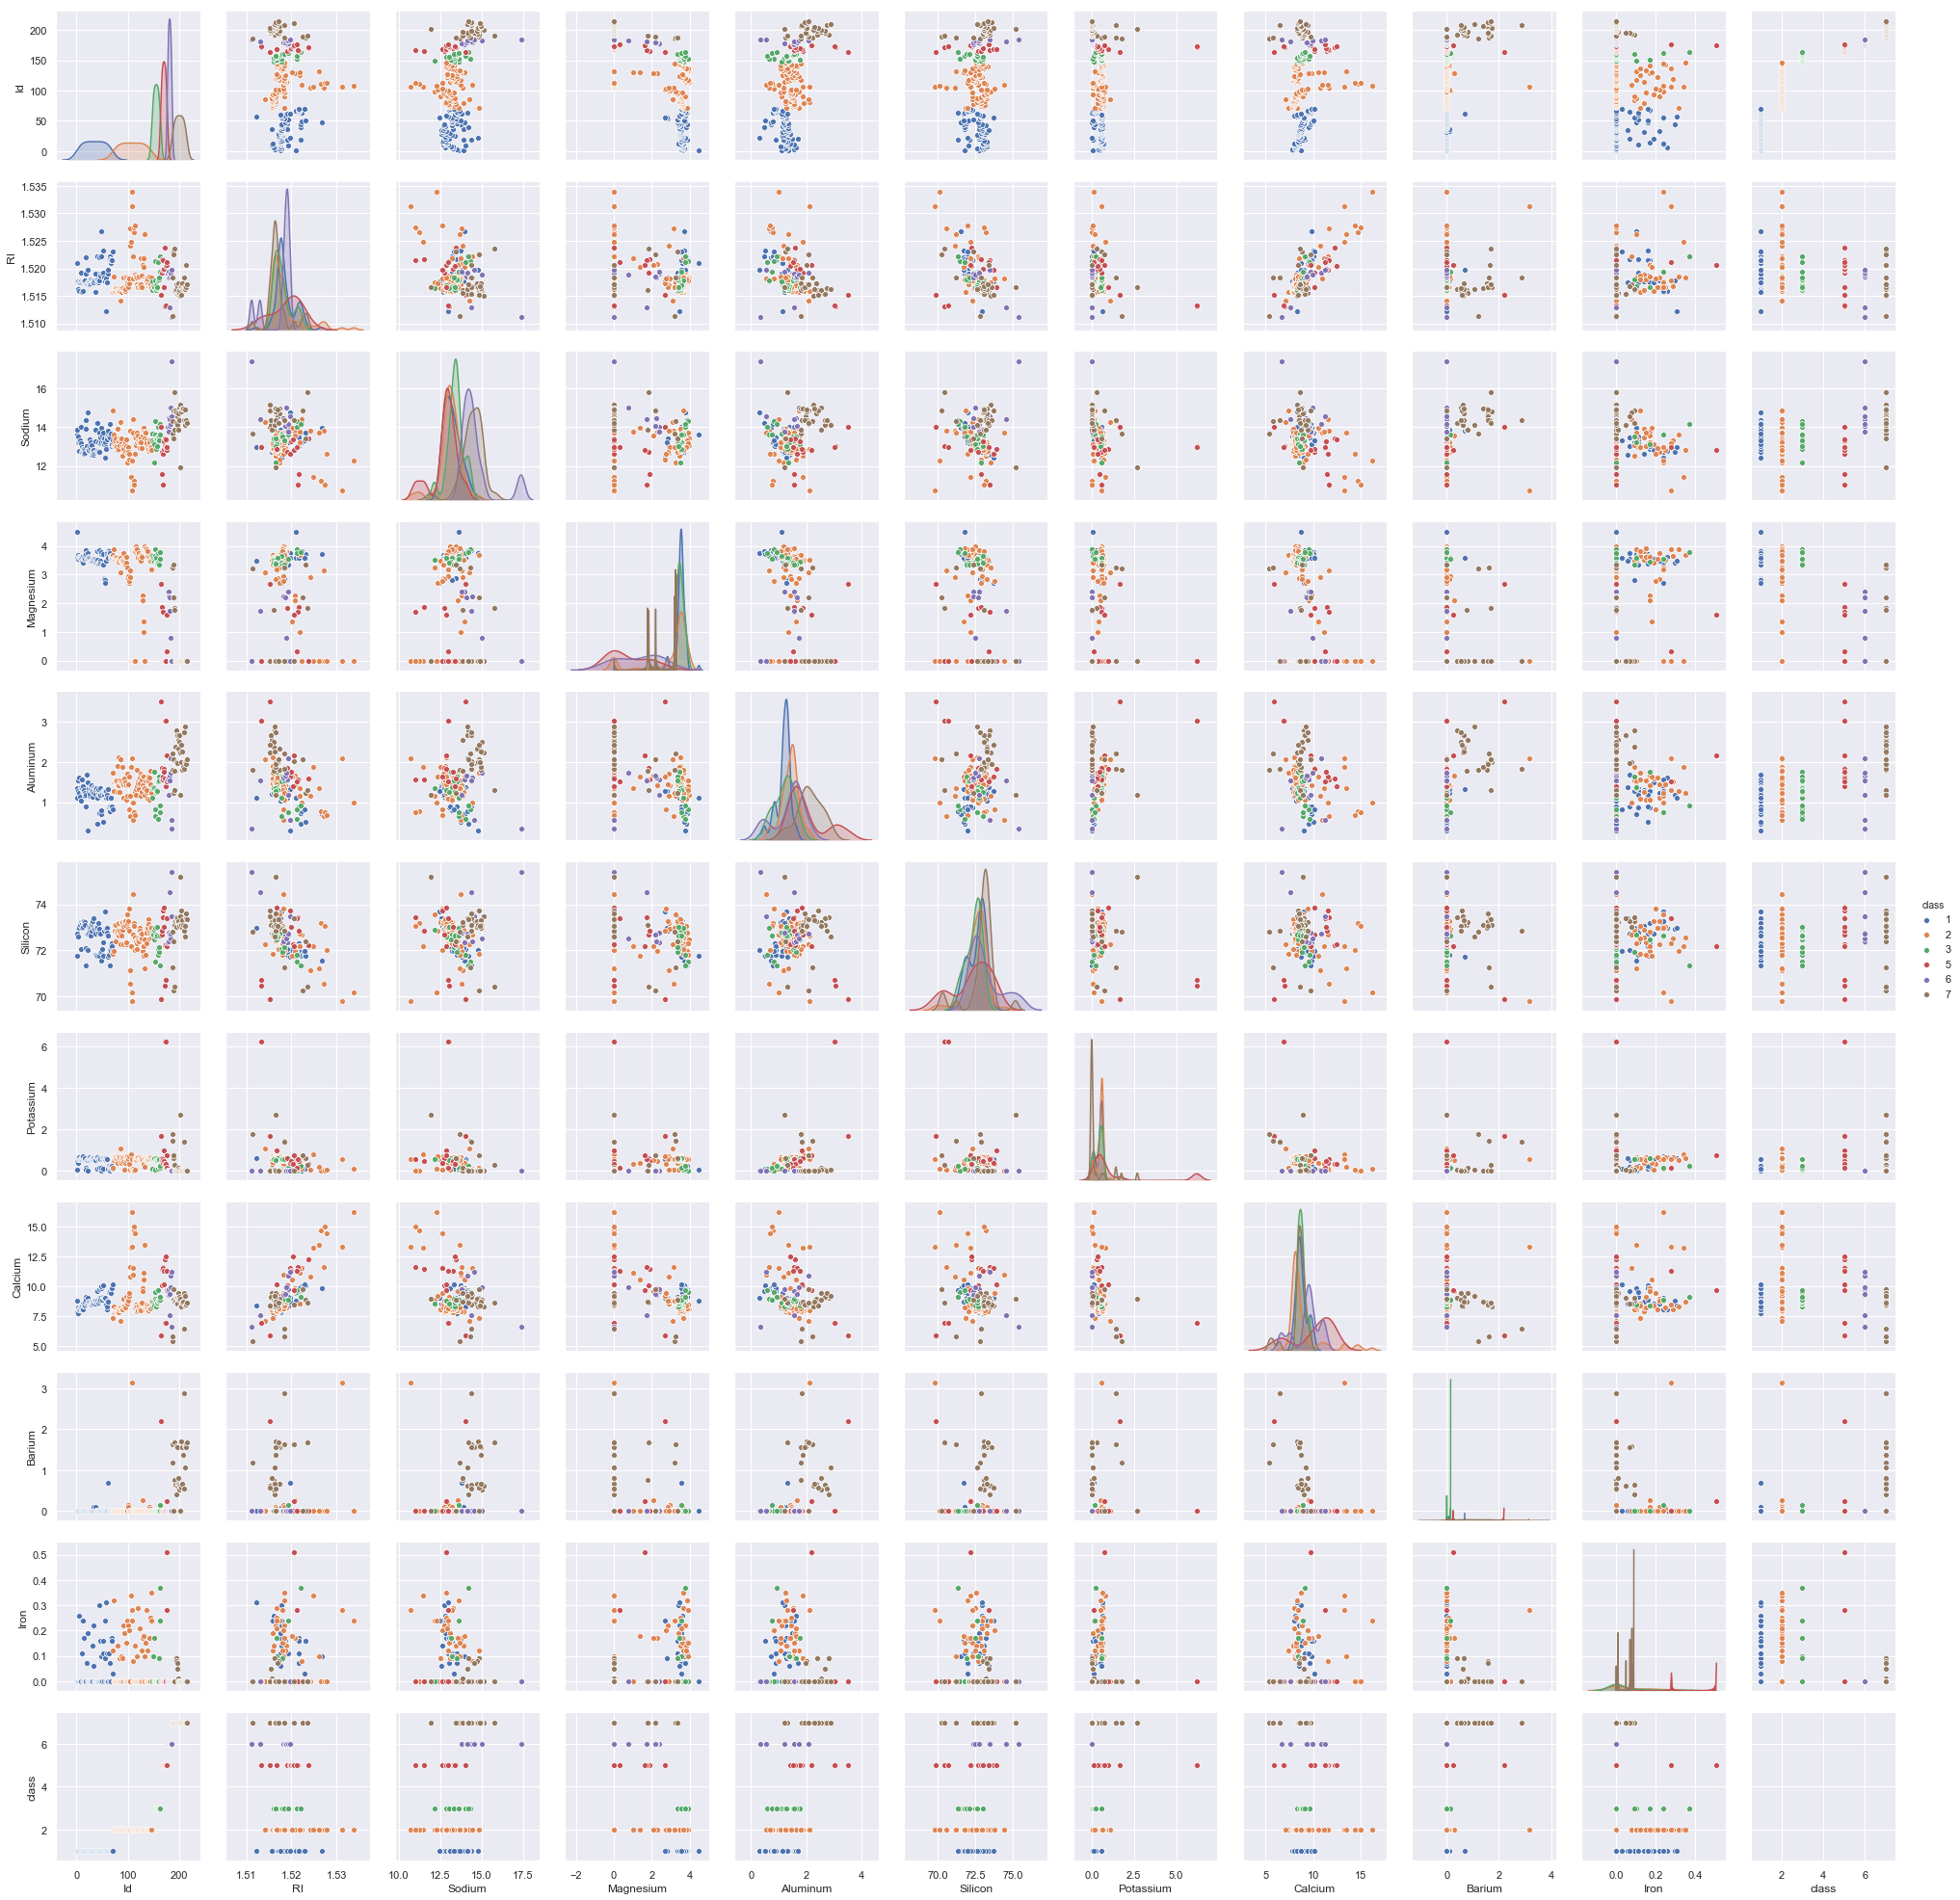

In [128]:
#Bivariate analysis and visualizations
#Correlation matrix with class as hue
sns.pairplot(glass_df, hue ='class')

There is high correlatio between the features

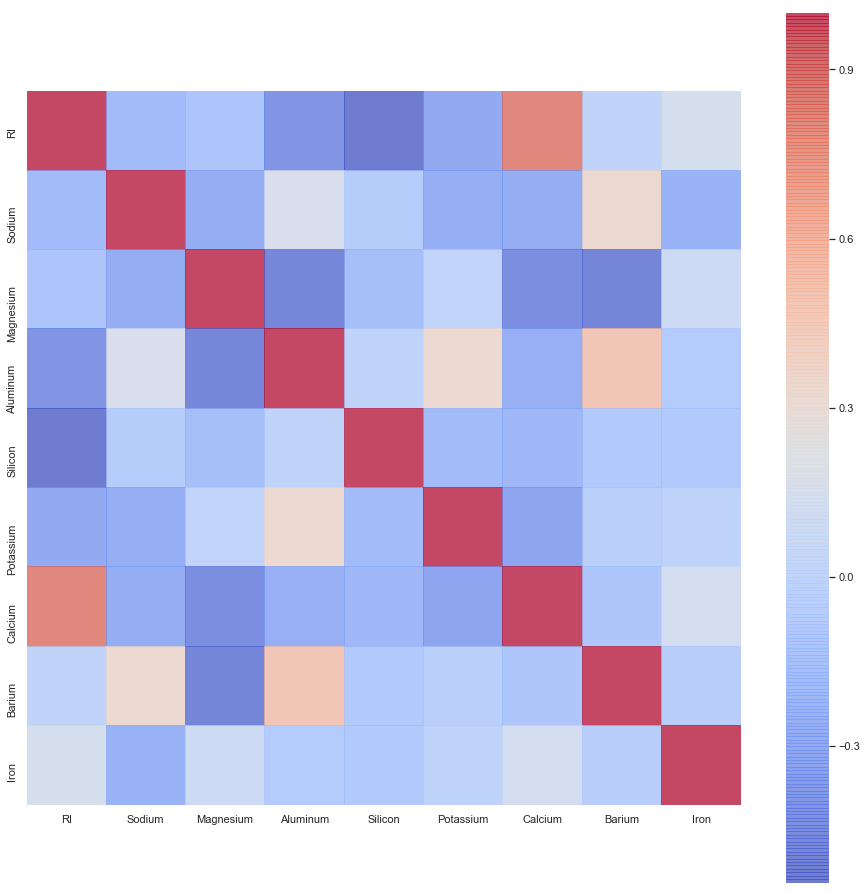

In [129]:
#Heatmap of features
corr = glass_df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, alpha = 0.7, cmap= 'coolwarm')
plt.show()

There is a high positve correlation between RI & Calcium and Aluminium & Barium.

#### 3.Data Preperation

In [196]:
X = glass_df[['RI', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron']].values
y = glass_df['class'].values

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [198]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [199]:
# Standardize the data before modeling  
sc = StandardScaler()
#Fit on training set
sc.fit(X_train)

#Apply transform to both train and test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 4.Baseline model: train a KNN classifier to serve as the baseline.

In [200]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [201]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.77
Misclassified samples: 10


In [202]:
#Finding accuracy for different values of k
neighbors = list(range(1,50,2))
scores=[]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    scores.append(accuracy_score(y_test, y_pred))

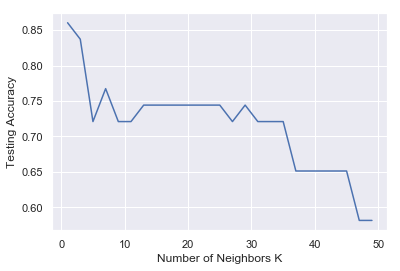

In [203]:
#Plotting testing accuracy for different values of K
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Testing Accuracy')
plt.show()

k=1 seems to be giving the highest accuracy.

#### 5.Parameter tuning with cross validation:

In [205]:
# creating odd list of K for KNN
# subsetting just the odd ones
neighbors = list(range(1,50,2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [206]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

In [207]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


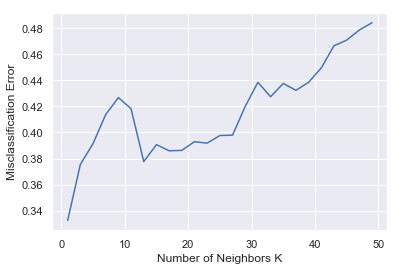

In [208]:
# Plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

The missclassification error is lowest when k=1.

In [266]:
#Test the model with optimal k value
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [267]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.86
Misclassified samples: 6


The efficiency of the model improved from 77% to 86% by changing the k to its optimal value.

#### 6.Apply Diagnostics:

In [ ]:
Weighted voting - This can be implemented by passing weights attribute in the knn() classifier. 
                  The weights can be given the value 'uniform' or 'distance'. 'distance' will give the weight points 
                  by the inverse of their distance. 
        
Distance metrics - The default metrics used in the model is Euclidean distance. other measures are
                  Manhattan, Chebyshev, Hamming distance, cosine, Chi square, and Minkowsky
PCA - Reduce the dimensionality 

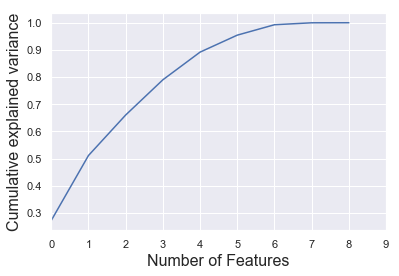

In [242]:
#PCA
pca = PCA()
pca.fit(X_train_std)
var_ratio = pca.explained_variance_ratio_
components = pca.components_

#Plotting the PCs vs cumulative variance
plt.plot(np.cumsum(var_ratio))
plt.xlim(0,9,1)
plt.xlabel('Number of Features', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16)
plt.show()

More than 95% of the variance can be explained by the first 5 principle components.

In [243]:
pca = PCA(n_components = 5)
pca.fit(X_train_std)

#Apply PCA transormation on train and test set
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [244]:
#Fit the KNN on PCA transformed set.
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [245]:
y_pred = knn.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.81
Misclassified samples: 8


Reducing the dimensionality using PCA has reduced the accuracy of the model to 81%

In [256]:
#Implementing weighed voting and changing distance metrics to Manhattan distance

knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='manhattan')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [257]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.86
Misclassified samples: 6


The 'Manhattan' distance metric and weighted voting did not have any effect on the accuracy.

In [258]:
#Implemention chebyshev distance metric

knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='chebyshev')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [259]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.77
Misclassified samples: 10


The chebyshev metric reduced the accuracy.

In [260]:
#Implemention hamming distance metric

knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='hamming')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='distance')

In [261]:
y_pred = knn.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.49
Misclassified samples: 22


This metric has reduced the accuracy drastically

The ideal distance metric seems to be Euclidean, and the optimal value of k is 1. This model achieved an accuracy of 86%

In [268]:
#Confusion matrix for the original kn model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[14,  0,  0,  0,  0],
       [ 3, 12,  2,  0,  0],
       [ 0,  0,  2,  0,  1],
       [ 0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  7]], dtype=int64)

In [269]:
#Use pandas crosstab to generate confusion matrix in more readable format
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,5,6,7,All
True,,,,,,
1,14,0,0,0,0,14
2,3,12,2,0,0,17
5,0,0,2,0,1,3
6,0,0,0,2,0,2
7,0,0,0,0,7,7
All,17,12,4,2,8,43


There are 6 misclassified predictions, as had seen before at the time of prediction. 

In [273]:
#generate the classification report to study the performance of the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.82      1.00      0.90        14
          2       1.00      0.71      0.83        17
          5       0.50      0.67      0.57         3
          6       1.00      1.00      1.00         2
          7       0.88      1.00      0.93         7

avg / total       0.89      0.86      0.86        43



The report above indicates that the model has a high precision rate or positive predictive value. 
There is 100% precision rate for class 2 and 6, ie,  every time the classifier predicted these classes, it was a correct 
prediction. However, the recall rate of class 2 is only 71% because the classifier was not able to predict all the class 2 
cases correctly. For class 6, the recall rate is also 100%. Thus the f1-score for class 6 is maximum. But the point to note is 
there is only 2 instances of class 6 in the test data(hence the best performance).

The precision rate as well as recall rate is low for class 5, which means te model did not predict all the cases of class 5
correctly and whenever it predicted the class 5, not all caes were correct.

One thing to note here is that the testing set (y_test) did not include any data with class = '3'. 
So we do not have any information on this class on the confusion matrix. 